# HARSH JOSHI
## Data Science Intern at TSF
## GRIP Sept 2021

## Objective
The aim of this task is to predict the score of a student who studies for 9.25 hours using the data given to us. Linear Regression Algorithm is used to predict the score for this supervised learning task.

### Importing Libraries 

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
df=pd.read_csv('http://bit.ly/w-data')

## Exploratory Data Analysis

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [196]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

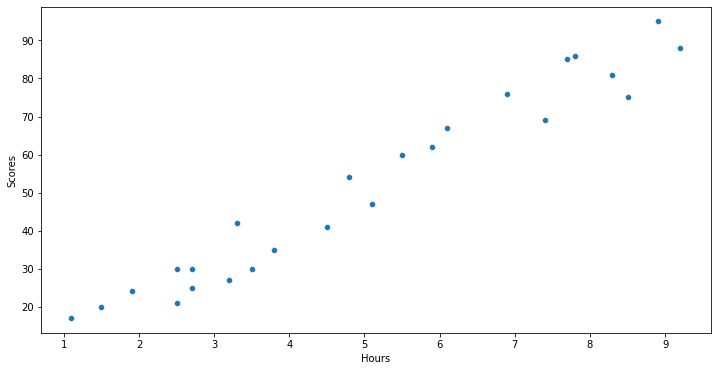

In [197]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Hours',y='Scores',data=df)


In [198]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation between Scores and Hours of 0.976 suggest that the score is highly dependent on the number  of study hours.


Checking for any missing values.

In [199]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [200]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x244a66848b0>,
 'caps': [<matplotlib.lines.Line2D at 0x244a6684f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x244a6684550>],
 'medians': [<matplotlib.lines.Line2D at 0x244a6697670>],
 'fliers': [<matplotlib.lines.Line2D at 0x244a66979d0>],
 'means': []}

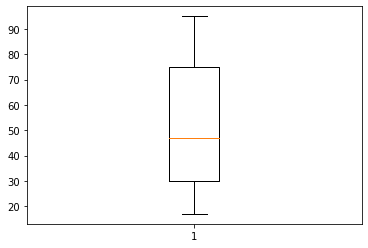

In [201]:
plt.boxplot(df['Scores'])

## Training data and Test data 

In [202]:
X=df['Hours']
y=df['Scores']

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
lm=LinearRegression()

Now, fitting the training dataset into our linear regression model and then predicting the scores using test set.


In [207]:
lm.fit(X_train.values.reshape(-1,1),y_train)   #fitting the model into training dataset.                                 

LinearRegression()

In [208]:
(lm.coef_,lm.intercept_)                 #the coefficient and intercept of the linear regression model.

(array([9.68207815]), 2.826892353899737)

Plotting the regression plot for the given dataset.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

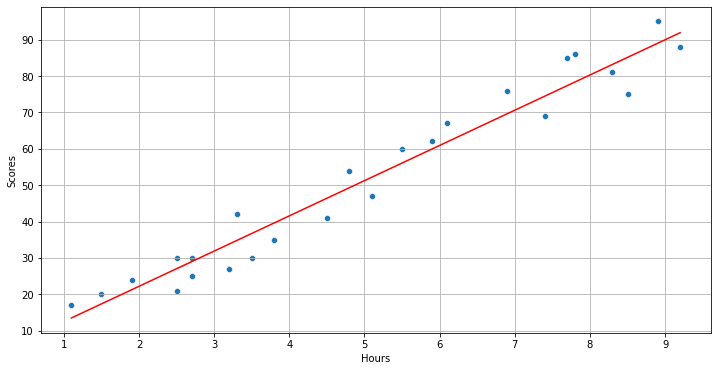

In [209]:
plt.figure(figsize=(12,6))
plt.grid('whitegrid')
sns.scatterplot('Hours','Scores',data=df)
sns.lineplot(X,lm.coef_*X+lm.intercept_,color='r')

## Predictions on the Test Set

In [210]:
predictions=lm.predict(X_test.values.reshape(-1,1))                    #predicting scores for the test data set

In [211]:
predictions

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [212]:
predict_vs_actual=pd.DataFrame({'Actual Scores':y_test,'Predicted Scores':predictions})

In [213]:
predict_vs_actual

,Actual Scores,Predicted Scores
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


### Predictions when a student studies for 9.25 hours

In [219]:
hours=9.25
predicted_score=lm.predict(np.array(hours).reshape(1,-1))

In [225]:
print("The predicted score when a student studies for",hours, "is", predicted_score)

The predicted score when a student studies for 9.25 is [92.38611528]


## Evaluating performace of our model.

In [185]:
from sklearn import metrics

In [186]:
print('The Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

The Root Mean Squared Error: 4.352380006653288
